In [1]:
import pandas as pd
import numpy as np

## Data Cleaning: Transaction.csv

In [107]:
df=pd.read_csv("C:/Users/atharv/Downloads/Transactions.csv")

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


In [109]:
df.sample(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
7313,7314,53,861,10-04-2017,True,Approved,Giant Bicycles,Standard,high,medium,1274.93,$764.96,39298.0
5596,5597,26,2111,17-07-2017,True,Approved,WeareA2B,Standard,medium,medium,1992.93,$762.63,33552.0
335,336,55,506,05-10-2017,True,Approved,Trek Bicycles,Road,medium,large,1894.19,$598.76,37823.0
10943,10944,58,95,30-10-2017,False,Approved,OHM Cycles,Standard,medium,medium,912.52,$141.40,42145.0
4145,4146,3,3268,09-05-2017,False,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41009.0
2186,2187,0,1568,14-03-2017,True,Approved,NaN,NaN,NaN,NaN,1348.41,NaN,NaN
1015,1016,41,3093,17-05-2017,False,Approved,Norco Bicycles,Standard,low,medium,958.74,$748.90,35160.0
12803,12804,96,2997,27-09-2017,False,Approved,WeareA2B,Road,low,small,1172.78,"$1,043.77",37539.0
8464,8465,99,359,19-01-2017,True,Approved,OHM Cycles,Standard,medium,medium,1227.34,$770.89,34556.0
13252,13253,49,3202,18-08-2017,True,Approved,Trek Bicycles,Road,medium,medium,533.51,$400.13,39915.0


In [110]:
df.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [111]:
df['transaction_id'].duplicated().sum()

0

In [112]:
unique_products=df['product_id'].unique().size

In [113]:
unique_products

101

In [114]:
unique_customers=df['customer_id'].unique().size

In [115]:
unique_customers

3494

In [11]:
df['online_order'].value_counts()

True     9829
False    9811
Name: online_order, dtype: int64

In [12]:
df['online_order'].fillna(True,inplace=True)

<AxesSubplot:>

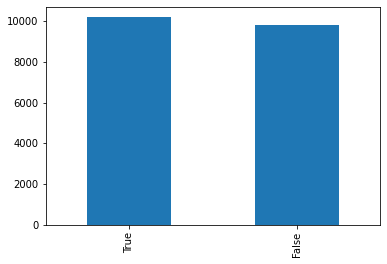

In [13]:
df['online_order'].value_counts().plot(kind='bar')

In [14]:
df.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               0.000
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [15]:
df['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [16]:
df['brand'].fillna('Solex',inplace=True)

In [17]:
df.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               0.000
order_status               0.000
brand                      0.000
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [18]:
df['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [19]:
df['product_line'].fillna('Standard',inplace=True)

In [20]:
df['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [21]:
df['product_class'].fillna('medium',inplace=True)

In [22]:
df['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [23]:
df['product_size'].fillna('medium',inplace=True)

In [24]:
df['standard_cost'] = df['standard_cost'].str.replace('$','')
df['standard_cost'] = df['standard_cost'].str.replace(',','')

<ipython-input-24-15e531dc0bf5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['standard_cost'] = df['standard_cost'].str.replace('$','')


In [25]:
convert_dict = {
                'standard_cost': float
                }
 
df['standard_cost'] = df['standard_cost'].astype(convert_dict)

In [26]:
df['standard_cost'].mean()
df['standard_cost'].fillna(df['standard_cost'].mean(),inplace=True)

In [28]:
df['product_first_sold_date'].mean()
df['product_first_sold_date'].fillna(df['product_first_sold_date'].mean(),inplace=True)

In [29]:
df.isnull().mean()*100

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

## Data Cleaning: CustomerDemographic.csv

In [30]:
df2=pd.read_csv('C:/Users/atharv/Downloads/CustomerDemographic.csv',encoding='latin1')

In [31]:
df2

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,720,Darrel,Canet,Male,67,23-10-1931,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1,1092,Katlin,Creddon,Female,56,22-08-1935,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
2,3410,Merrili,Brittin,Female,93,22-09-1940,NaN,Property,Mass Customer,N,á,No,16.0
3,2413,Abbey,Murrow,Male,27,11-08-1943,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
4,658,Donn,Bonnell,Male,38,24-01-1944,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3779,Ulick,Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,NaN,No,NaN
3996,3883,Nissa,Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,NaN,No,NaN
3997,3931,Kylie,Epine,U,19,NaN,NaN,IT,High Net Worth,N,NaN,Yes,NaN
3998,3935,Teodor,Alfonsini,U,72,NaN,NaN,IT,High Net Worth,N,NaN,Yes,NaN


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [33]:
df2.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [34]:
df2.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
default                                 7.550
owns_car                                0.000
tenure                                  2.175
dtype: float64

In [35]:
df2['last_name'].mode()

0    Pristnor
1    Ramsdell
dtype: object

In [36]:
df2['last_name'].fillna('Missing',inplace=True)
df2['DOB'].fillna('0',inplace=True)

In [37]:
df2['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [38]:
df2.duplicated().sum()

0

In [39]:
df2['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [40]:
df2['gender']=df2['gender'].replace('F','Female')
df2['gender']=df2['gender'].replace('Femal','Female')
df2['gender']=df2['gender'].replace('M','Male')
df2['gender']=df2['gender'].replace('U','Unknown')

In [41]:
df2['gender'].value_counts()

Female     2039
Male       1873
Unknown      88
Name: gender, dtype: int64

In [42]:
df2.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               0.000
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     0.000
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
default                                 7.550
owns_car                                0.000
tenure                                  2.175
dtype: float64

In [43]:
df2['job_title'].value_counts()

Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
Legal Assistant                         41
                                        ..
Human Resources Assistant IV             4
Research Assistant III                   3
Health Coach I                           3
Health Coach III                         3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [44]:
df2['job_title'].fillna('Missing',inplace=True)

In [45]:
df2['job_industry_category'].fillna('Missing',inplace=True)

In [46]:
df2.drop(['default'],inplace=True,axis=1)

In [47]:
df2

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,720,Darrel,Canet,Male,67,23-10-1931,Recruiting Manager,Retail,Affluent Customer,N,No,6.0
1,1092,Katlin,Creddon,Female,56,22-08-1935,VP Quality Control,Retail,Mass Customer,N,No,5.0
2,3410,Merrili,Brittin,Female,93,22-09-1940,Missing,Property,Mass Customer,N,No,16.0
3,2413,Abbey,Murrow,Male,27,11-08-1943,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0
4,658,Donn,Bonnell,Male,38,24-01-1944,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3779,Ulick,Daspar,Unknown,68,0,Missing,IT,Affluent Customer,N,No,NaN
3996,3883,Nissa,Conrad,Unknown,35,0,Legal Assistant,IT,Mass Customer,N,No,NaN
3997,3931,Kylie,Epine,Unknown,19,0,Missing,IT,High Net Worth,N,Yes,NaN
3998,3935,Teodor,Alfonsini,Unknown,72,0,Missing,IT,High Net Worth,N,Yes,NaN


In [48]:
df2['tenure'].mean()

10.65704063378482

In [49]:
df2['tenure'].fillna(10.0,inplace=True)

In [50]:
import seaborn as sns

In [51]:
df2[df2['past_3_years_bike_related_purchases']>=0]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,720,Darrel,Canet,Male,67,23-10-1931,Recruiting Manager,Retail,Affluent Customer,N,No,6.0
1,1092,Katlin,Creddon,Female,56,22-08-1935,VP Quality Control,Retail,Mass Customer,N,No,5.0
2,3410,Merrili,Brittin,Female,93,22-09-1940,Missing,Property,Mass Customer,N,No,16.0
3,2413,Abbey,Murrow,Male,27,11-08-1943,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0
4,658,Donn,Bonnell,Male,38,24-01-1944,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3779,Ulick,Daspar,Unknown,68,0,Missing,IT,Affluent Customer,N,No,10.0
3996,3883,Nissa,Conrad,Unknown,35,0,Legal Assistant,IT,Mass Customer,N,No,10.0
3997,3931,Kylie,Epine,Unknown,19,0,Missing,IT,High Net Worth,N,Yes,10.0
3998,3935,Teodor,Alfonsini,Unknown,72,0,Missing,IT,High Net Worth,N,Yes,10.0


In [52]:
df2[df2['tenure']>=0]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,720,Darrel,Canet,Male,67,23-10-1931,Recruiting Manager,Retail,Affluent Customer,N,No,6.0
1,1092,Katlin,Creddon,Female,56,22-08-1935,VP Quality Control,Retail,Mass Customer,N,No,5.0
2,3410,Merrili,Brittin,Female,93,22-09-1940,Missing,Property,Mass Customer,N,No,16.0
3,2413,Abbey,Murrow,Male,27,11-08-1943,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0
4,658,Donn,Bonnell,Male,38,24-01-1944,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3779,Ulick,Daspar,Unknown,68,0,Missing,IT,Affluent Customer,N,No,10.0
3996,3883,Nissa,Conrad,Unknown,35,0,Legal Assistant,IT,Mass Customer,N,No,10.0
3997,3931,Kylie,Epine,Unknown,19,0,Missing,IT,High Net Worth,N,Yes,10.0
3998,3935,Teodor,Alfonsini,Unknown,72,0,Missing,IT,High Net Worth,N,Yes,10.0


## Data Cleaning: CustomerDemographic.csv

In [53]:
df3 = pd.read_csv('C:/Users/atharv/Downloads/CustomerAddress.csv')

In [54]:
df3=df3.iloc[:,:6]

In [55]:
df3

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [56]:
df3['customer_id'].duplicated().sum()

0

In [57]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [58]:
df3['customer_id'].unique().size

3999

In [59]:
df3.isnull().mean()*100

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

<AxesSubplot:ylabel='Frequency'>

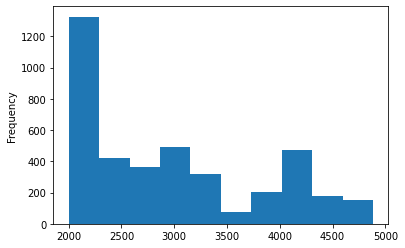

In [60]:
df3['postcode'].plot(kind='hist')

In [61]:
df3.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [62]:
df3['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [63]:
df3['state']=df3['state'].replace('NSW','New South Wales')
df3['state']=df3['state'].replace('QLD','Queensland')
df3['state']=df3['state'].replace('VIC','Victoria')

In [64]:
df3['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [65]:
df3

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,Queensland,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,Victoria,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,Victoria,Australia,3
3995,4000,57042 Village Green Point,4511,Queensland,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,New South Wales,Australia,10
3997,4002,8194 Lien Street,4032,Queensland,Australia,7


In [66]:
main=pd.merge(df, df2, left_on='customer_id', right_on='customer_id', how='inner')

In [67]:
main

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950,25-02-2017,False,Approved,Solex,Standard,medium,medium,...,Anthony,Male,19,11-01-1955,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,11065,1,2950,16-10-2017,False,Approved,Giant Bicycles,Standard,medium,medium,...,Anthony,Male,19,11-01-1955,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
2,18923,62,2950,26-04-2017,False,Approved,Solex,Standard,medium,medium,...,Anthony,Male,19,11-01-1955,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
3,2,3,3120,21-05-2017,True,Approved,Trek Bicycles,Standard,medium,large,...,O'Donnell,Female,89,04-02-1979,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
4,6862,4,3120,05-10-2017,False,Approved,Giant Bicycles,Standard,high,medium,...,O'Donnell,Female,89,04-02-1979,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,19854,68,130,02-02-2017,True,Approved,OHM Cycles,Standard,medium,medium,...,Delete,Male,32,18-07-1997,Chemical Engineer,Manufacturing,Mass Customer,N,No,1.0
19993,17966,17,2789,06-12-2017,False,Approved,Solex,Standard,high,medium,...,Bucksey,Female,66,30-11-1992,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0
19994,18462,80,2789,20-06-2017,False,Approved,OHM Cycles,Touring,low,medium,...,Bucksey,Female,66,30-11-1992,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0
19995,17981,69,3446,26-12-2017,True,Approved,Giant Bicycles,Road,medium,medium,...,Tidy,Male,8,30-01-1967,Structural Engineer,Manufacturing,Mass Customer,N,No,14.0


In [68]:
main.isnull().mean()*100

transaction_id                         0.0
product_id                             0.0
customer_id                            0.0
transaction_date                       0.0
online_order                           0.0
order_status                           0.0
brand                                  0.0
product_line                           0.0
product_class                          0.0
product_size                           0.0
list_price                             0.0
standard_cost                          0.0
product_first_sold_date                0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
DOB                                    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
owns_car                               0.0
tenure     

In [69]:
final=pd.merge(main, df3, left_on='customer_id', right_on='customer_id', how='inner')

In [70]:
final.isnull().mean()*100

transaction_id                         0.0
product_id                             0.0
customer_id                            0.0
transaction_date                       0.0
online_order                           0.0
order_status                           0.0
brand                                  0.0
product_line                           0.0
product_class                          0.0
product_size                           0.0
list_price                             0.0
standard_cost                          0.0
product_first_sold_date                0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
DOB                                    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
owns_car                               0.0
tenure     

In [71]:
#final.to_csv('C:/Users/atharv/Downloads/Sprockets_Customers.csv',index=False)

In [72]:
final['DOB']=final['DOB'].replace('1843-12-21','21-12-1843')

In [73]:
from datetime import datetime
final['DOB'] = pd.to_datetime(final[final['DOB']!='0']['DOB'], format='%d-%m-%Y')

In [74]:
final[final['DOB']=='0']['DOB']

Series([], Name: DOB, dtype: datetime64[ns])

In [75]:
from datetime import date
now = date.today()


In [76]:
final['DOB'][0]

Timestamp('1955-01-11 00:00:00')

In [77]:
final['DOB']=now.year-pd.DatetimeIndex(final['DOB']).year

In [78]:
final['DOB']

0        68.0
1        68.0
2        68.0
3        44.0
4        44.0
         ... 
19963    26.0
19964    31.0
19965    31.0
19966    56.0
19967    56.0
Name: DOB, Length: 19968, dtype: float64

In [79]:
final[final['DOB']=='0']['DOB'] = final[final['DOB']=='0']['DOB'].astype(float)

In [80]:
final.rename(columns={'DOB': 'Age'}, inplace=True)

In [81]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19968 non-null  int64  
 1   product_id                           19968 non-null  int64  
 2   customer_id                          19968 non-null  int64  
 3   transaction_date                     19968 non-null  object 
 4   online_order                         19968 non-null  bool   
 5   order_status                         19968 non-null  object 
 6   brand                                19968 non-null  object 
 7   product_line                         19968 non-null  object 
 8   product_class                        19968 non-null  object 
 9   product_size                         19968 non-null  object 
 10  list_price                           19968 non-null  float64
 11  standard_cost               

In [82]:
final['Age'].sample(10)

17418    32.0
1707     62.0
8978     52.0
1947     49.0
6266      NaN
6655     51.0
444      42.0
2931     23.0
1683     67.0
928      49.0
Name: Age, dtype: float64

In [83]:
final.isnull().mean()*100

transaction_id                         0.000000
product_id                             0.000000
customer_id                            0.000000
transaction_date                       0.000000
online_order                           0.000000
order_status                           0.000000
brand                                  0.000000
product_line                           0.000000
product_class                          0.000000
product_size                           0.000000
list_price                             0.000000
standard_cost                          0.000000
product_first_sold_date                0.000000
first_name                             0.000000
last_name                              0.000000
gender                                 0.000000
past_3_years_bike_related_purchases    0.000000
Age                                    2.233574
job_title                              0.000000
job_industry_category                  0.000000
wealth_segment                         0

In [84]:
final.fillna(0.0,inplace=True)

In [85]:
final.isnull().mean()*100

transaction_id                         0.0
product_id                             0.0
customer_id                            0.0
transaction_date                       0.0
online_order                           0.0
order_status                           0.0
brand                                  0.0
product_line                           0.0
product_class                          0.0
product_size                           0.0
list_price                             0.0
standard_cost                          0.0
product_first_sold_date                0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
Age                                    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
owns_car                               0.0
tenure     

In [86]:
final['Age'] = final['Age'].astype(int)

In [87]:
final['Profit'] = final['list_price']-final['standard_cost']

In [88]:
gk=final.groupby(['customer_id'])

In [89]:
pf=pd.DataFrame(gk['Profit'].sum())

In [92]:
pf.sort_values(by=['Profit'], ascending=False,inplace=True)

In [93]:
pf

,Profit
customer_id,
941,11668.95
2637,11222.65
1460,10787.60
1558,10640.30
729,10497.78
...,...
3189,50.18
3272,41.13
2274,35.74


In [94]:
pf.reset_index(inplace=True)

In [95]:
pf

,customer_id,Profit
0,941,11668.95
1,2637,11222.65
2,1460,10787.60
3,1558,10640.30
4,729,10497.78
...,...,...
3484,3189,50.18
3485,3272,41.13
3486,2274,35.74
3487,2532,17.87


In [96]:
pf=pf.iloc[:1000,:]

In [97]:
pf

,customer_id,Profit
0,941,11668.95
1,2637,11222.65
2,1460,10787.60
3,1558,10640.30
4,729,10497.78
...,...,...
995,2044,3977.45
996,2831,3975.17
997,3417,3975.14
998,1947,3974.81


In [98]:
Top_1000_Customers=final.groupby(['customer_id','first_name','Age','gender','job_industry_category','wealth_segment','state','past_3_years_bike_related_purchases'])

In [100]:
Top_1000_Customers=pd.DataFrame(Top_1000_Customers['Profit'].sum())

In [101]:
Top_1000_Customers

,,,,,,,,Profit
customer_id,first_name,Age,gender,job_industry_category,wealth_segment,state,past_3_years_bike_related_purchases,
1,Laraine,70,Female,Health,Mass Customer,New South Wales,93,3018.09
2,Eli,43,Male,Financial Services,Mass Customer,New South Wales,81,2226.26
4,Talbot,62,Male,IT,Mass Customer,Queensland,33,220.57
5,Sheila-kathryn,46,Female,Missing,Affluent Customer,New South Wales,56,2394.94
6,Curr,57,Male,Retail,High Net Worth,Victoria,35,3946.55
...,...,...,...,...,...,...,...,...
3496,Danya,37,Male,Manufacturing,Mass Customer,New South Wales,99,2045.84
3497,Thia,37,Female,Manufacturing,Affluent Customer,Victoria,73,1648.32
3498,Lois,28,Female,Manufacturing,Mass Customer,Victoria,28,3147.33


In [102]:
Top_1000_Customers.sort_values(by=['Profit'], ascending=False,inplace=True)

In [103]:
Top_1000_Customers.reset_index(inplace=True)

In [104]:
Top_1000_Customers=Top_1000_Customers.iloc[:1000,:]

In [105]:
Top_1000_Customers

,customer_id,first_name,Age,gender,job_industry_category,wealth_segment,state,past_3_years_bike_related_purchases,Profit
0,941,Tye,28,Male,Financial Services,Affluent Customer,Queensland,13,11668.95
1,2637,Marcile,51,Female,Retail,Mass Customer,New South Wales,28,11222.65
2,1460,Morley,50,Male,Financial Services,High Net Worth,New South Wales,92,10787.60
3,1558,Oberon,32,Male,Financial Services,Affluent Customer,New South Wales,14,10640.30
4,729,Ammamaria,50,Female,Health,Affluent Customer,Victoria,30,10497.78
...,...,...,...,...,...,...,...,...,...
995,2044,Leyla,25,Female,Health,Mass Customer,New South Wales,84,3977.45
996,2831,Starlin,55,Female,Health,Mass Customer,New South Wales,16,3975.17
997,3417,Deedee,50,Female,Health,Mass Customer,Victoria,91,3975.14
998,1947,Gretta,60,Female,Telecommunications,Affluent Customer,New South Wales,66,3974.81


In [106]:
Top_1000_Customers.to_csv('C:/Users/atharv/Downloads/Top_1000_Sprockets_Customers.csv',index=False)